#Exercise 4, assignement 2: Text classifiction
### Traffic seniment in Pakistan

Import data

In [2]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

Prepare data

In [3]:
# Delete the duplicate rows
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

Comparing models, methods and tuning hyperparameters

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
The accuracy of the model is: 0.9712918660287081


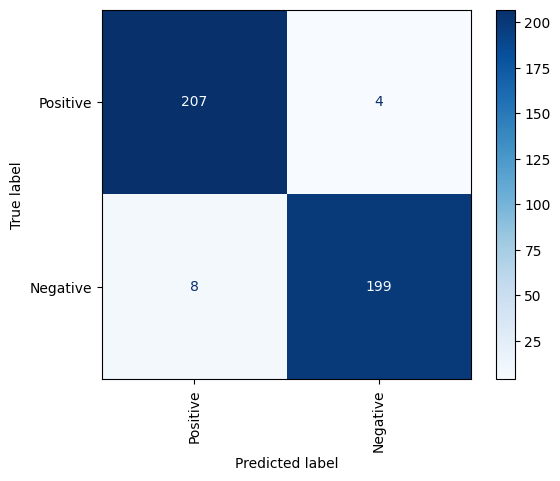

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from xgboost import XGBClassifier
import os
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#Vecorization
#(3)TfidfVectorizer
vectorizer = TfidfVectorizer(
    min_df=20, norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1), #Try this!
    stop_words='english')


# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# Model
#(4)XGBoost
model =  XGBClassifier()
param_grid = {
     'learning_rate': [0.01, 0.1, 0.2],
     'n_estimators': [100, 200, 300],
     'max_depth': [3, 4, 5],
}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all
# parameter combinations.
grid_search.fit(x_train_vectorized, y_train)

#`best_params` and `best_score` store the best hyperparameters and their
# corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search,
# which can be used for further analysis.
model = grid_search.best_estimator_

#(6)Naïve Bayes models
# model=BernoulliNB()
# param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}

#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )


#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))